# PROBLEM STATEMENTS

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) & (AGI>100) & (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year or less then.

## Importing Libraries that will come handy for the projects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
data = pd.read_csv("D:\\data set\\adult.data", names = columns)

In [3]:
data

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


From the above code we can observe that the data set contains 32561 rows × 15 columns.

## Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


 From the above we can observe that our data do not contain any missing value and  our target value "Income" has an Object datatype, so before moving further lets convert it into numerical datatype  

In [5]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['Income'] = labelEncoder.fit_transform(data['Income'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Final Weight'}>,
        <AxesSubplot:title={'center':'Education Number'}>],
       [<AxesSubplot:title={'center':'Capital Gain'}>,
        <AxesSubplot:title={'center':'Capital Loss'}>,
        <AxesSubplot:title={'center':'Hours per Week'}>],
       [<AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

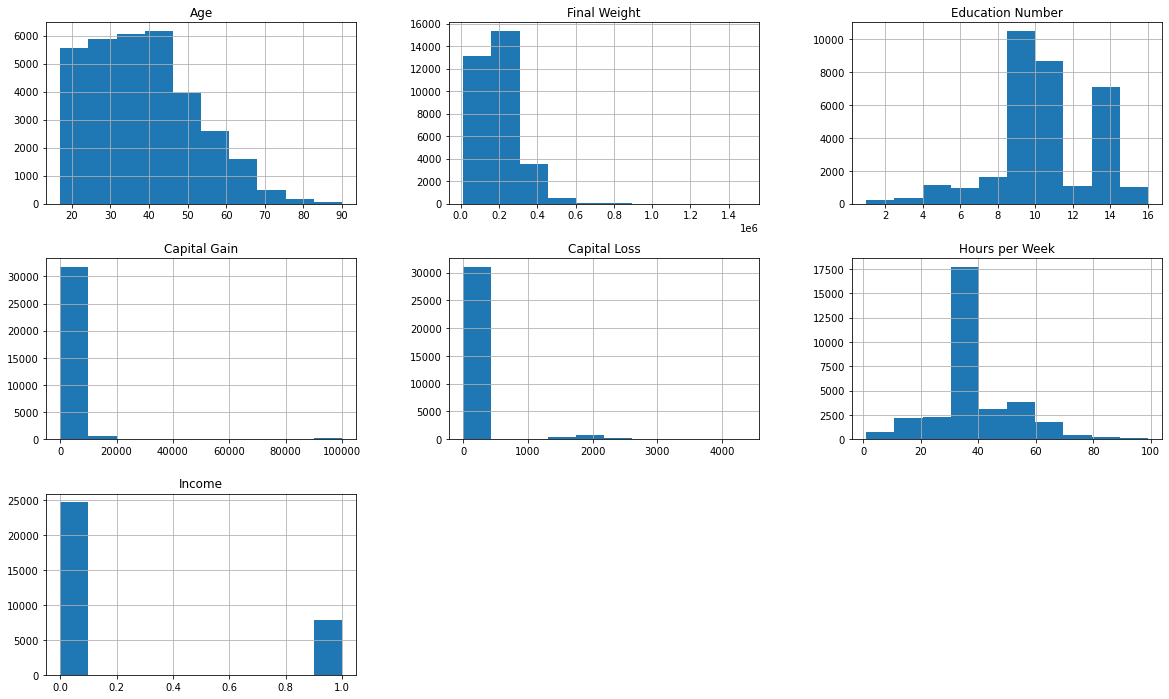

In [7]:
data.hist(figsize=(20,12))


From the above graphs we can conclude

a) Age and Hours per Week column can be group into bins.
b) In column Capital Gain,Capital Loss and Final Weight the data is left skewed.

<AxesSubplot:>

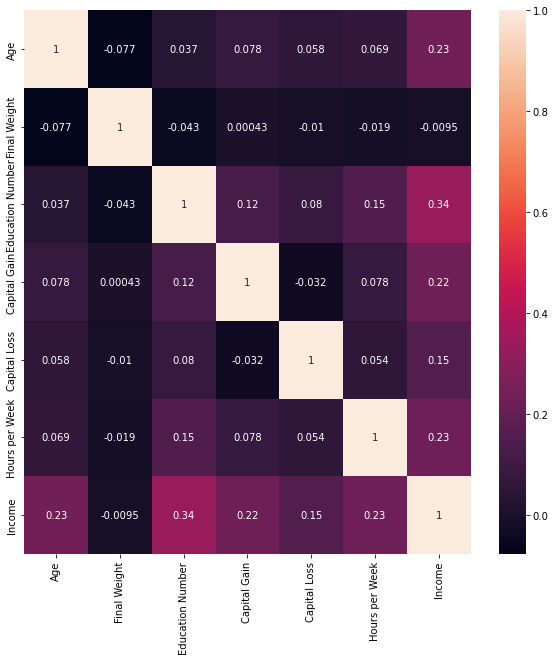

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

From the above graph we can observe that there is not very high linear correlation with the target  column("Income") and final wweight column have zero correlation with the target value. so we can drop it.

## AGE

bucketing the age columns into different bins as shown below

a) 0-25: Young

b) 25-50: Adult

c) 50-100: Old

In [9]:
data['Age'] = pd.cut(data['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])  

<AxesSubplot:xlabel='Age', ylabel='count'>

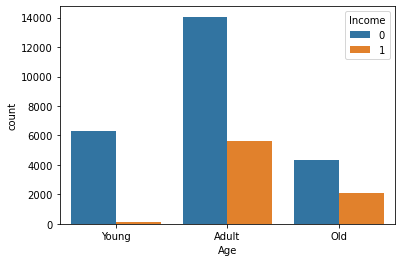

In [10]:
sns.countplot(x = 'Age', hue = 'Income', data = data)

From the above graph it can be observed that there is very less young people having Income grated than $50K

## Hours per Week

bucketing the age columns into different bins as shown below

a) 0-30: Low Hrs

b) 30-40: Normal Hrs

c) 40-100:High Hrs

In [11]:
data['Hours per Week'] = pd.cut(data['Hours per Week'], bins = [0, 30, 40, 100], labels = ['Low Hrs', 'Normal Hrs', 'High Hrs'])  

<AxesSubplot:xlabel='Hours per Week', ylabel='count'>

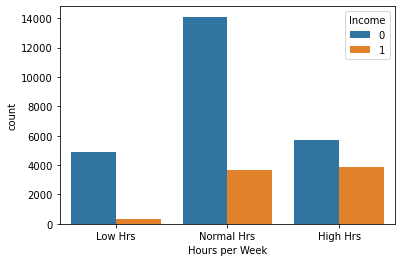

In [12]:
sns.countplot(x = 'Hours per Week', hue = 'Income', data = data)

From the above graph it can be observe that as the working hours increase the no of people receving more than 50k also increase.

## Final Weight

As already discussed we can drop the column as it have zero correlation with the target column.

In [13]:
data.drop(['Final Weight'], axis = 1, inplace = True)

In [14]:
data

,Age,Work Class,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,Adult,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,Normal Hrs,United-States,0
1,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,Low Hrs,United-States,0
2,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,Normal Hrs,United-States,0
3,Old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,Normal Hrs,United-States,0
4,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Normal Hrs,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Adult,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,Normal Hrs,United-States,0
32557,Adult,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,Normal Hrs,United-States,1
32558,Old,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,Normal Hrs,United-States,0
32559,Young,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,Low Hrs,United-States,0


## Capital Gain and Capital loss

Using the above two column we can come up with new feature.
Capital_diff= Capital Gain-Capital loss

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

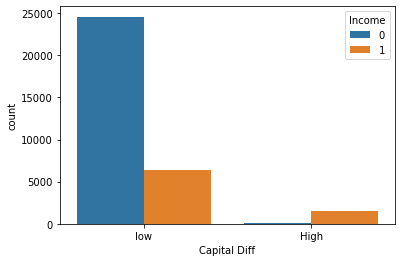

In [15]:
data['Capital Diff'] = data['Capital Gain'] - data['Capital Loss']
data.drop(['Capital Gain'], axis = 1, inplace = True)
data.drop(['Capital Loss'], axis = 1, inplace = True)
data['Capital Diff'] = pd.cut(data['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['low', 'High'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = data)

we can observe that for both the category low and high people with hight Income (more than 50k)

## Work Class

<AxesSubplot:xlabel='Work Class', ylabel='count'>

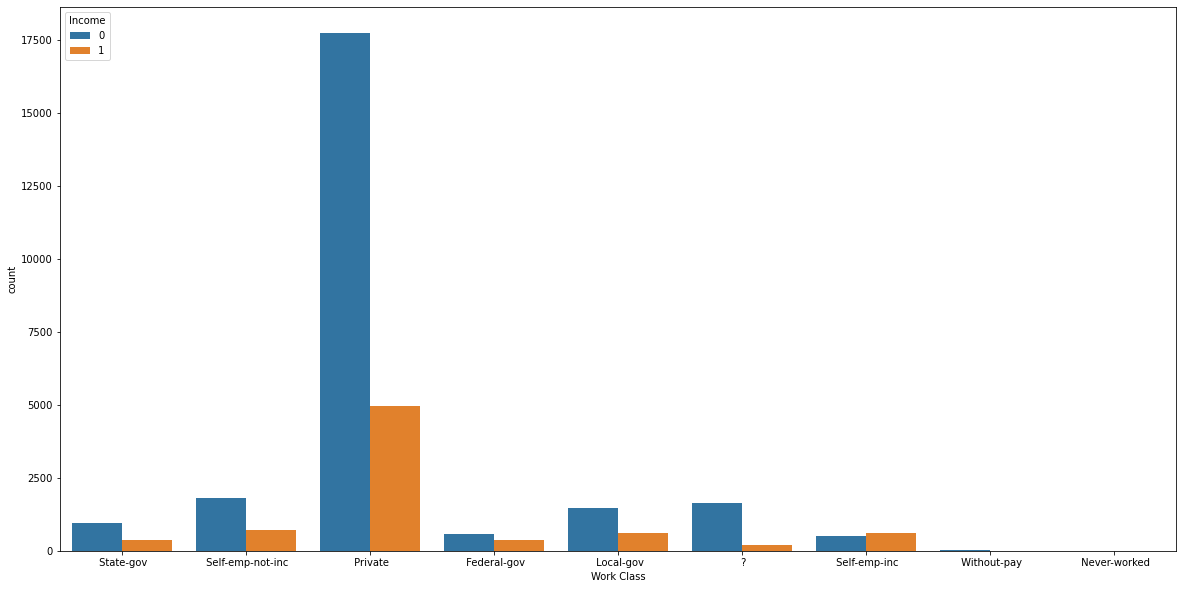

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Work Class', hue = 'Income', data = data)

From the above graph it can be observed that "without pay" and "Never-worked" column have very less records so it is safe to remove them.
 we can also observe a category "?" , it is a error and have very low vaalue so we can remove it too.


In [17]:
data = data.drop(data[data['Work Class'] == ' ?'].index)
data = data.drop(data[data['Work Class'] == ' Without-pay'].index)
data = data.drop(data[data['Work Class'] == ' Never-worked'].index)

In [18]:
data

,Age,Work Class,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Country,Income,Capital Diff
0,Adult,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,Normal Hrs,United-States,0,low
1,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low Hrs,United-States,0,low
2,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hrs,United-States,0,low
3,Old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Normal Hrs,United-States,0,low
4,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Normal Hrs,Cuba,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Adult,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,Normal Hrs,United-States,0,low
32557,Adult,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Normal Hrs,United-States,1,low
32558,Old,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,Normal Hrs,United-States,0,low
32559,Young,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,Low Hrs,United-States,0,low


## Education and Education Number

<AxesSubplot:xlabel='Education', ylabel='count'>

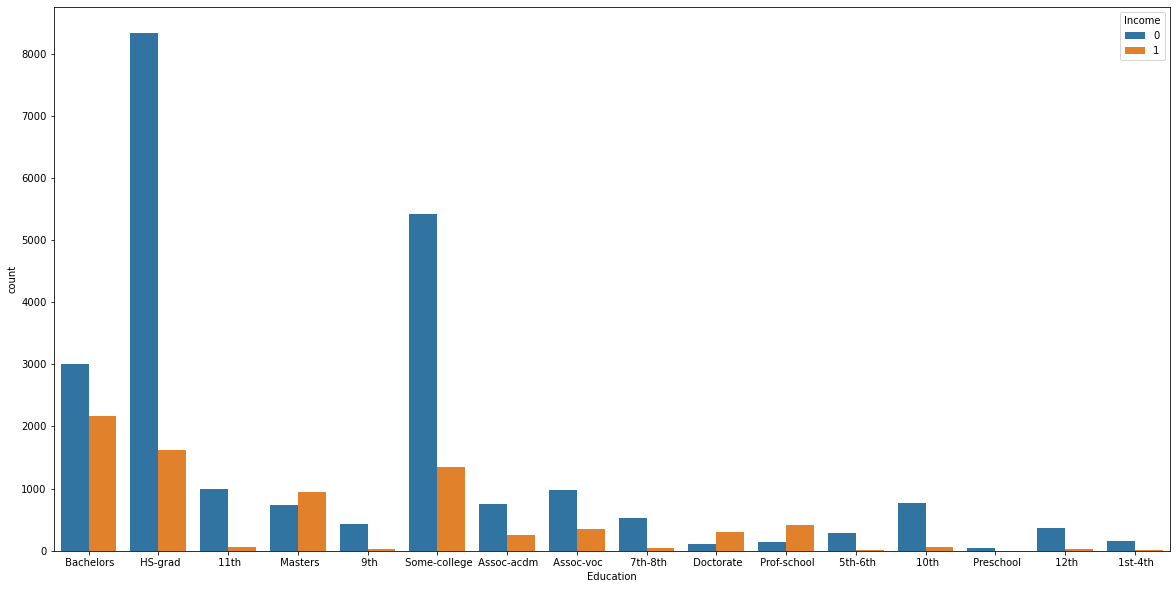

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Education', hue = 'Income', data = data)

In [20]:
data['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1019
 10th             831
 7th-8th          572
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: Education, dtype: int64

## Marital Status and Relationship

In [21]:
data['Relationship'].value_counts()

 Husband           12700
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: Relationship, dtype: int64

In [22]:
data['Marital Status'].value_counts()

 Married-civ-spouse       14331
 Never-married             9908
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

## Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

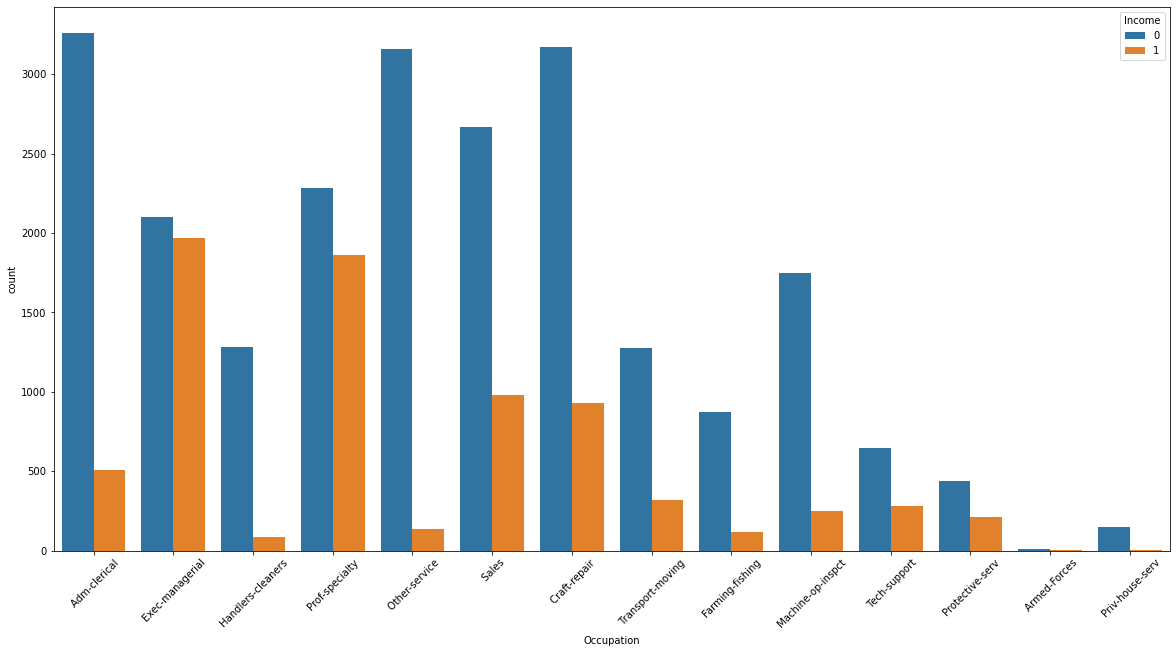

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = data)

From the above grap it can be observe that there is no missing value and there is all unique catagories so we can keep it as it is

## Race

<AxesSubplot:xlabel='Race', ylabel='count'>

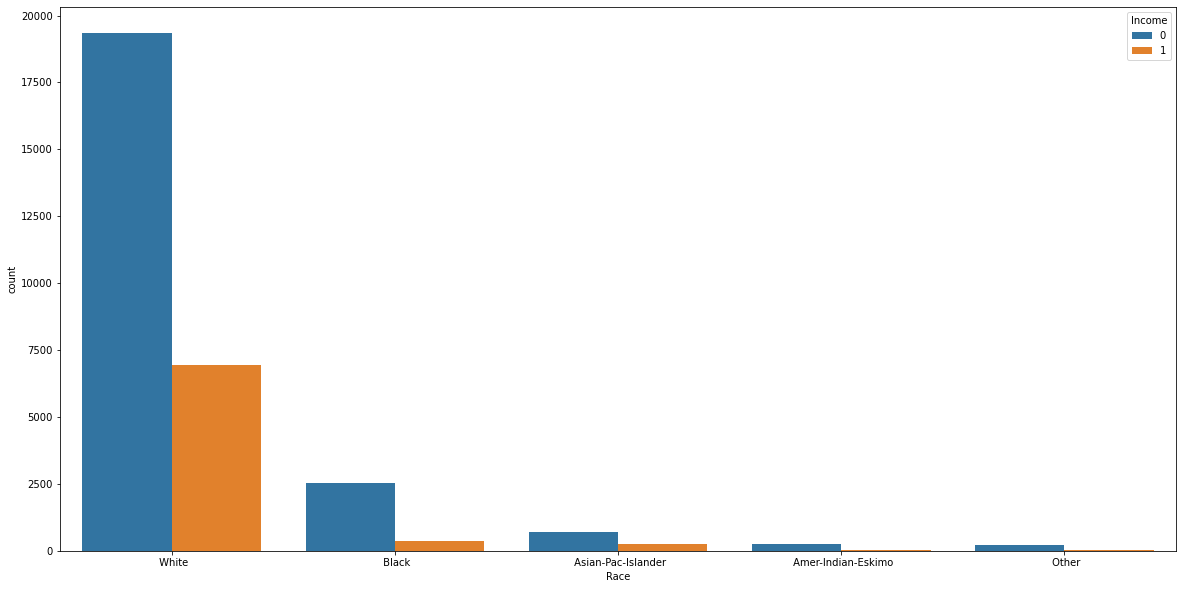

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Race', hue = 'Income', data = data)

From the above graph it can be observed that the maximum information is about white people so we can combine other categories in one as others.

In [25]:
data['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

<AxesSubplot:xlabel='Race', ylabel='count'>

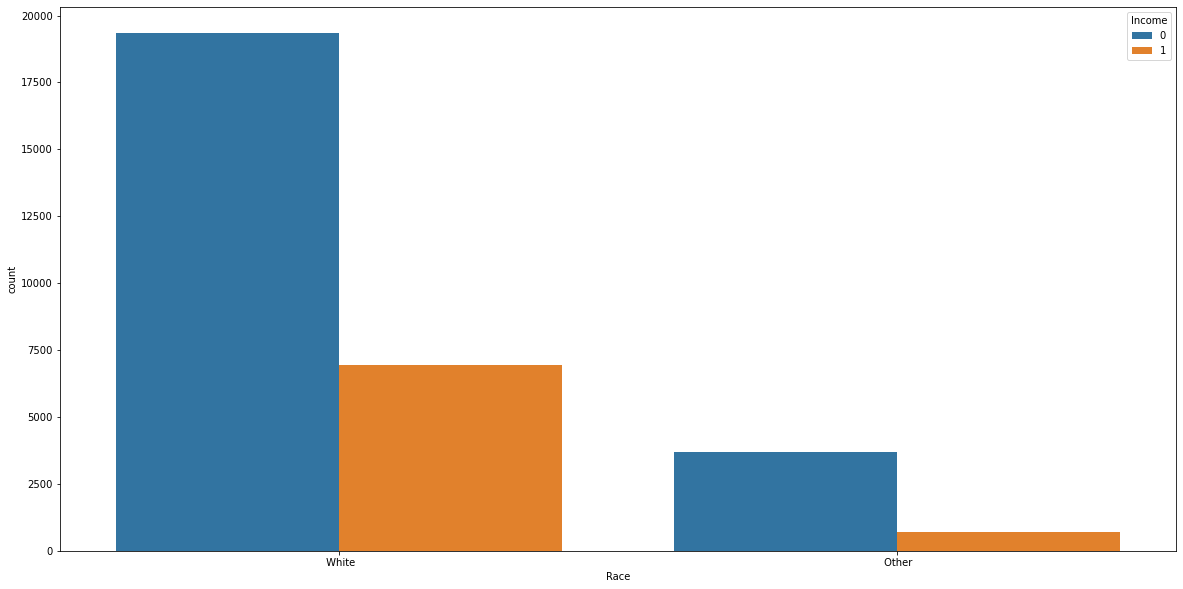

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Race', hue = 'Income', data = data)

## Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

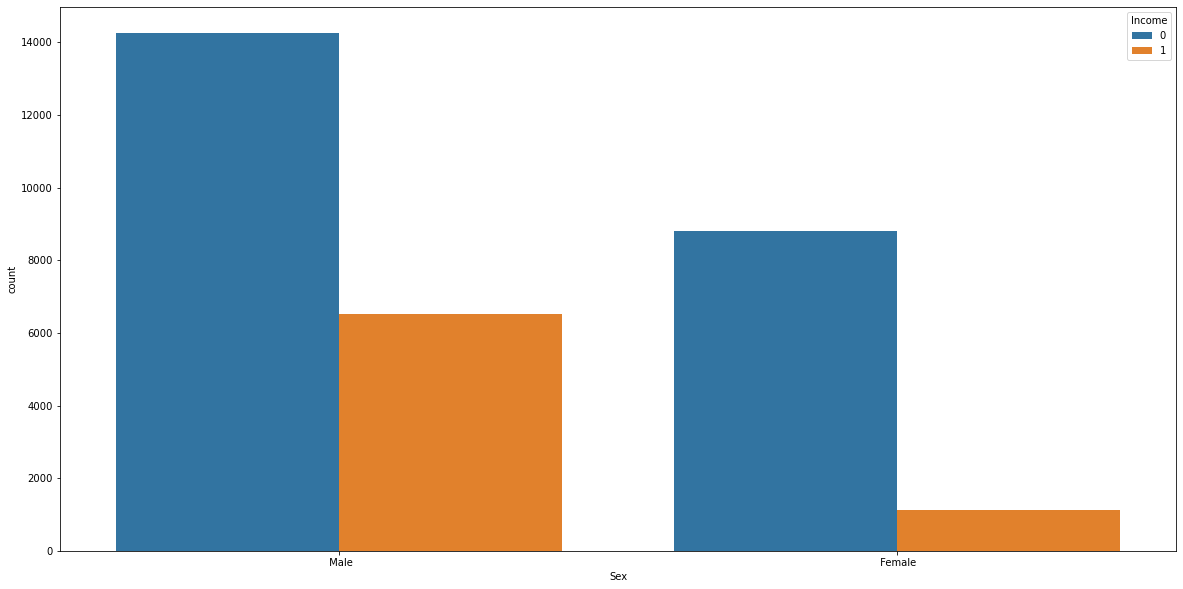

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Sex', hue = 'Income', data = data)

From the above it can be observe that there are more Male than compare to Female and there are more male reciving salary more than 50k

## Country

In [28]:
data['Country'].value_counts()

 United-States                 27491
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

From the above it can be observed that there is some category with "?" that can be droped and majorty of people are from "US" so we can create two category as " US  and OTHERS"

In [33]:
dataset = data.drop(data[data['Country'] == ' ?'].index)
countries = np.array(data['Country'].unique())
countries = np.delete(countries, 0)
data['Country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='Country', ylabel='count'>

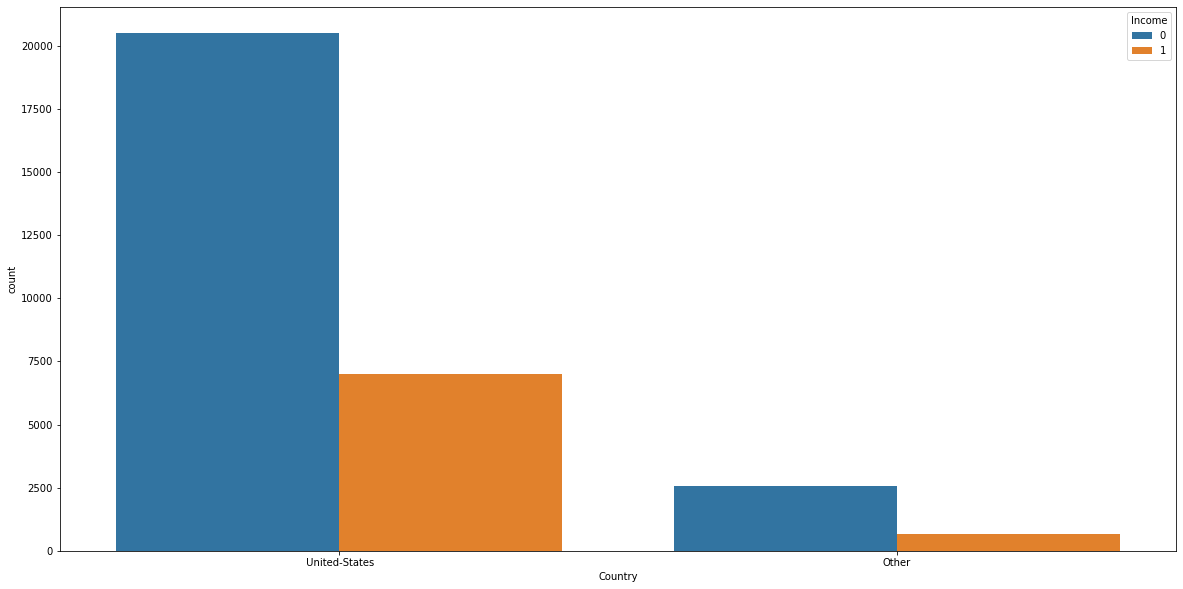

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Country', hue = 'Income', data = dataset)

## Splitting the datasets into features and target value

In [35]:
data

,Age,Work Class,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Country,Income,Capital Diff
0,Adult,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,Normal Hrs,United-States,0,low
1,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low Hrs,United-States,0,low
2,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hrs,United-States,0,low
3,Old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,Normal Hrs,United-States,0,low
4,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Other,Female,Normal Hrs,Other,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Adult,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,Normal Hrs,United-States,0,low
32557,Adult,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Normal Hrs,United-States,1,low
32558,Old,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,Normal Hrs,United-States,0,low
32559,Young,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,Low Hrs,United-States,0,low


In [37]:
y = data['Income']
x= data.drop(['Income'], axis = 1)
x = pd.get_dummies(x)
print("Total features: {}".format(x.shape[1]))

Total features: 64


In [38]:
x

,Education Number,Age_Young,Age_Adult,Age_Old,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Private,Work Class_ Self-emp-inc,Work Class_ Self-emp-not-inc,Work Class_ State-gov,...,Race_ White,Sex_ Female,Sex_ Male,Hours per Week_Low Hrs,Hours per Week_Normal Hrs,Hours per Week_High Hrs,Country_ United-States,Country_Other,Capital Diff_low,Capital Diff_High
0,13,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,13,0,1,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,1,0
2,9,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,7,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,13,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,1,0,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,1,0
32557,9,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
32558,9,0,0,1,0,0,1,0,0,0,...,1,1,0,0,1,0,1,0,1,0
32559,9,1,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,1,0,1,0


In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 30704, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 13)

## Machine learning

### Importing libraries

In [42]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []



In [45]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.61
Support Vector Classifier:
F1 score: 0.63
Decision Tree Classifier:
F1 score: 0.61
Random Forest Classifier:
F1 score: 0.65
Gradient Boosting Classifier:
F1 score: 0.66


#### From the above result it can be observe that "Gradient Boosting Classifier: F1 score: 0.66" is performing best